In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
payroll = pd.read_csv("/Users/vamseemuppavarapu/data.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleansing

In [4]:
payroll = payroll[pd.notnull(payroll['Payroll Department'])]
payroll.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
payroll.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
payroll.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [5]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    payroll[i] = payroll[i].str.replace('$','')

# Outlier removal

In [6]:
payroll = payroll[payroll.Annual_sal != 0]  
payroll = payroll[payroll.Base_Pay != 0]
payroll.Annual_sal = payroll.Annual_sal.astype(float)
payroll.Base_Pay = payroll.Base_Pay.astype(float)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


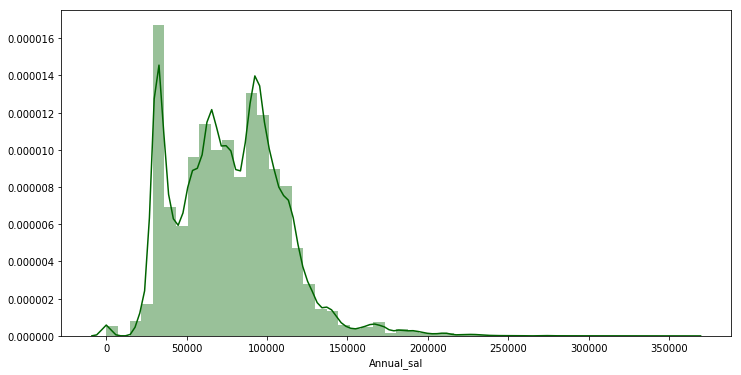

In [7]:
plt.figure(figsize = (12,6))
sns.distplot(payroll.Annual_sal,color = 'darkgreen')

Creating different Sample from the population

In [8]:
payroll_2015 = payroll[payroll.Year ==2015]
payroll_2016 = payroll[payroll.Year ==2016]


Calculating the Population Parameters

In [9]:
pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152505301
Population Standard Deviation: 34232.25489729045


Calculating the Sample Parameters

In [10]:
print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))

Population Mean: 78711.19987225177
Sample Mean: 78758.45050519651
Sample Standard Deviation: 34204.36907882172


Hypothesis Testing

Normal distribution

Null Hypothesis : Pay does not increase in 2016

Alternate Hypothesis: It increases

Population parameters: Mean = pop_mean_2015, standard deviation = pop_std_2015

Sample parameters : Mean = sample_mean_2016, standard deviation = sample_std_2016

In [11]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
# Calculate the test statistics 
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)

7.486909369924394


As the test statistics fall into the rejection region the null hypothesis is rejected

Therefore the Annual salaries will increase in 2016.

Checking for error type1/type2

In [12]:
# we are basically checking the true value of the population characteristics
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016.Annual_sal)

zscore_error = ((pop_mean_2016 - pop_mean_2015)/pop_std_2016)
print(zscore_error)

0.07937359898019851


We can say that we have encountered a Type 1 error as the population mean is within acceptable region

## Similarly apply T-Distribution for hypothesis testing and check the error.

In [13]:
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2015 = payroll[payroll.Year ==2015]
# Creating Sample distribution for T statistics
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)

In [18]:
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)
N = len(payroll_t_2015_sample)
sample_mean_2015 = payroll_t_2015_sample['Annual_sal'].mean()
sample_std_2015 = statistics.stdev(payroll_t_2015_sample.Annual_sal)
pop_std_2014  = statistics.stdev(payroll_2014.Annual_sal)
pop_mean_2014 = payroll_2014['Annual_sal'].mean()

In [19]:
N

30